# 1. Ôn tập: Singular Value Decomposition (SVD)

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def compute_svd(matrix):
    U, S, V_T = np.linalg.svd(matrix)
    return U, S, V_T

In [24]:
#Question 1
matrix = np.array([[7, 1], [0, 0], [5, 5]])
U, S, VT = compute_svd(matrix)
S = np.diag(S)
print(np.matrix.round(S,2))
print(U)

[[9.49 0.  ]
 [0.   3.16]]
[[-0.70710678  0.70710678  0.        ]
 [ 0.          0.         -1.        ]
 [-0.70710678 -0.70710678  0.        ]]


# Project 1: Ứng dụng SVD vào bài toán image compression (bài toán nén ảnh)

# 🌈 Cách chuyển ảnh màu sang ảnh xám

Một ảnh màu (RGB hoặc BGR) có 3 kênh màu:

- **Red (R)**
- **Green (G)**
- **Blue (B)**

Ảnh xám (*grayscale*) chỉ có một kênh duy nhất, giá trị mỗi pixel thể hiện mức độ sáng từ đen đến trắng.

## 🔢 Công thức chuyển đổi ảnh màu sang ảnh xám

Mỗi pixel trong ảnh màu được chuyển sang ảnh xám bằng cách tính tổng có trọng số của ba kênh màu theo công thức:

$$
\text{Gray} = 0.2126 \times R + 0.7152 \times G + 0.0722 \times B
$$

### 🔹 Lý do chọn tỷ lệ này:

- Mắt người nhạy cảm nhất với màu **xanh lá (Green)**, nên nó có trọng số cao nhất (**0.7152**).
- Màu **đỏ (Red)** có trọng số thấp hơn (**0.2126**).
- Màu **xanh dương (Blue)** ít ảnh hưởng nhất nên có trọng số thấp nhất (**0.0722**).


In [27]:
def convertColorToGrayScale(image, ratio):
    """
    Chuyển ảnh màu sang ảnh xám theo trọng số.
    
    Tham số:
    - image: ảnh màu dạng NumPy array (BGR nếu dùng OpenCV)
    - ratio: danh sách 3 số, thể hiện trọng số của (R, G, B)
    
    Trả về:
    - Ảnh xám dạng NumPy array
    """
    #result = np.dot(image[..., :3], ratio) # Chỉ lấy 3 kênh đầu (BGR hoặc RGB)
    result = image @ ratio
    result = result.astype(np.uint8) # Chuyển đổi giá trị pixel về kiểu uint8 (0-255) để hiển thị đúng
    return result

In [28]:
#Question 2
color_image = cv2.imread("cat_final_project.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
print(np.sum(gray_image))

5969956


In [29]:
import numpy as np
from numpy.linalg import norm

def compute_cosine_similarity(matrix1, matrix2):
    vec1 = matrix1.flatten()
    vec2 = matrix2.flatten()
    result = np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))
    return result

In [30]:
def computeVectorLength(vector):
    len_of_vector = np.linalg.norm(vector)
    return len_of_vetor

In [31]:
#Question 3
A = np.array([[1,2,2],
               [3,2,2],
               [-2,1,-3]])
B = np.array([[4,2,4],
               [2,-2,5],
               [3,4,-4]])
result = compute_cosine_similarity(A,B)
print(np.round(result,2))

2.87


In [32]:
from math import sqrt
def compute_rms_error(matrix1, matrix2):
    m, n = np.shape(matrix1)
    result = np.sqrt(np.sum(np.square(matrix1 - matrix2)) / (m * n))
    return result

In [33]:
#Question 4
A = np.array([[1,2,2],
               [3,2,2],
               [-2,1,-3]])
B = np.array([[4,2,4],
               [2,-2,5],
               [3,4,-4]])
result = compute_rms_error(A,B)
print(round(result,2))

2.87


In [34]:
def evaluate_svd_for_feature_compression_by_metric(gray_image, metric):
    U, S, V_T = compute_svd(gray_image)
    k = len(S)
    S = np.diag(S)

    approx_list = []
    u_list = []
    metric_list = []

    for i in range(1, k + 1, 1):
        approx = U[:, :i] @ S[0:i, :i] @ V_T[:i, :]
        approx_list.append(approx)

        if metric == 0:
            metric_list.append(compute_cosine_similarity(gray_image, approx))
        else:
            metric_list.append(compute_rms_error(gray_image, approx))

    return metric_list, approx_list, k

def draw_metric_information(metric_list, k):
    x_axis = list(range(1, k + 1, 1))
    plt.xlabel('k')
    plt.ylabel('RMS error')
    plt.plot(x_axis, metric_list, color = "r")
    plt.show()

def draw_approx_image(approx_list, k):
    row = 6
    col = 4
    fig = plt.figure(figsize = (25, 25))
    fig_index = 1

    for i in range(0, k, 13):
        # Adds a subplot at the 1st postion
        fig.add_subplot(row, col, fig_index)
        # showing image
        plt.imshow(approx_list[i], cmap = "gray")
        plt.axis("off")
        plt.title("k =" + str(i+1))
        fig_index = fig_index + 1
        
    plt.show()

In [35]:
#Question 5
color_image = cv2.imread('cat_final_project.jpeg')
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
_, _, k  = evaluate_svd_for_feature_compression_by_metric(gray_image,0)
print(k)

300


300


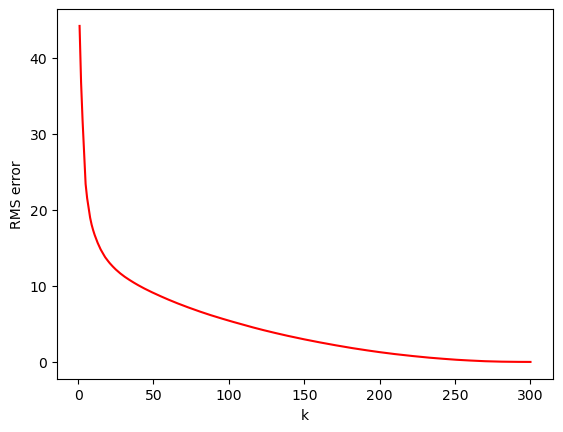

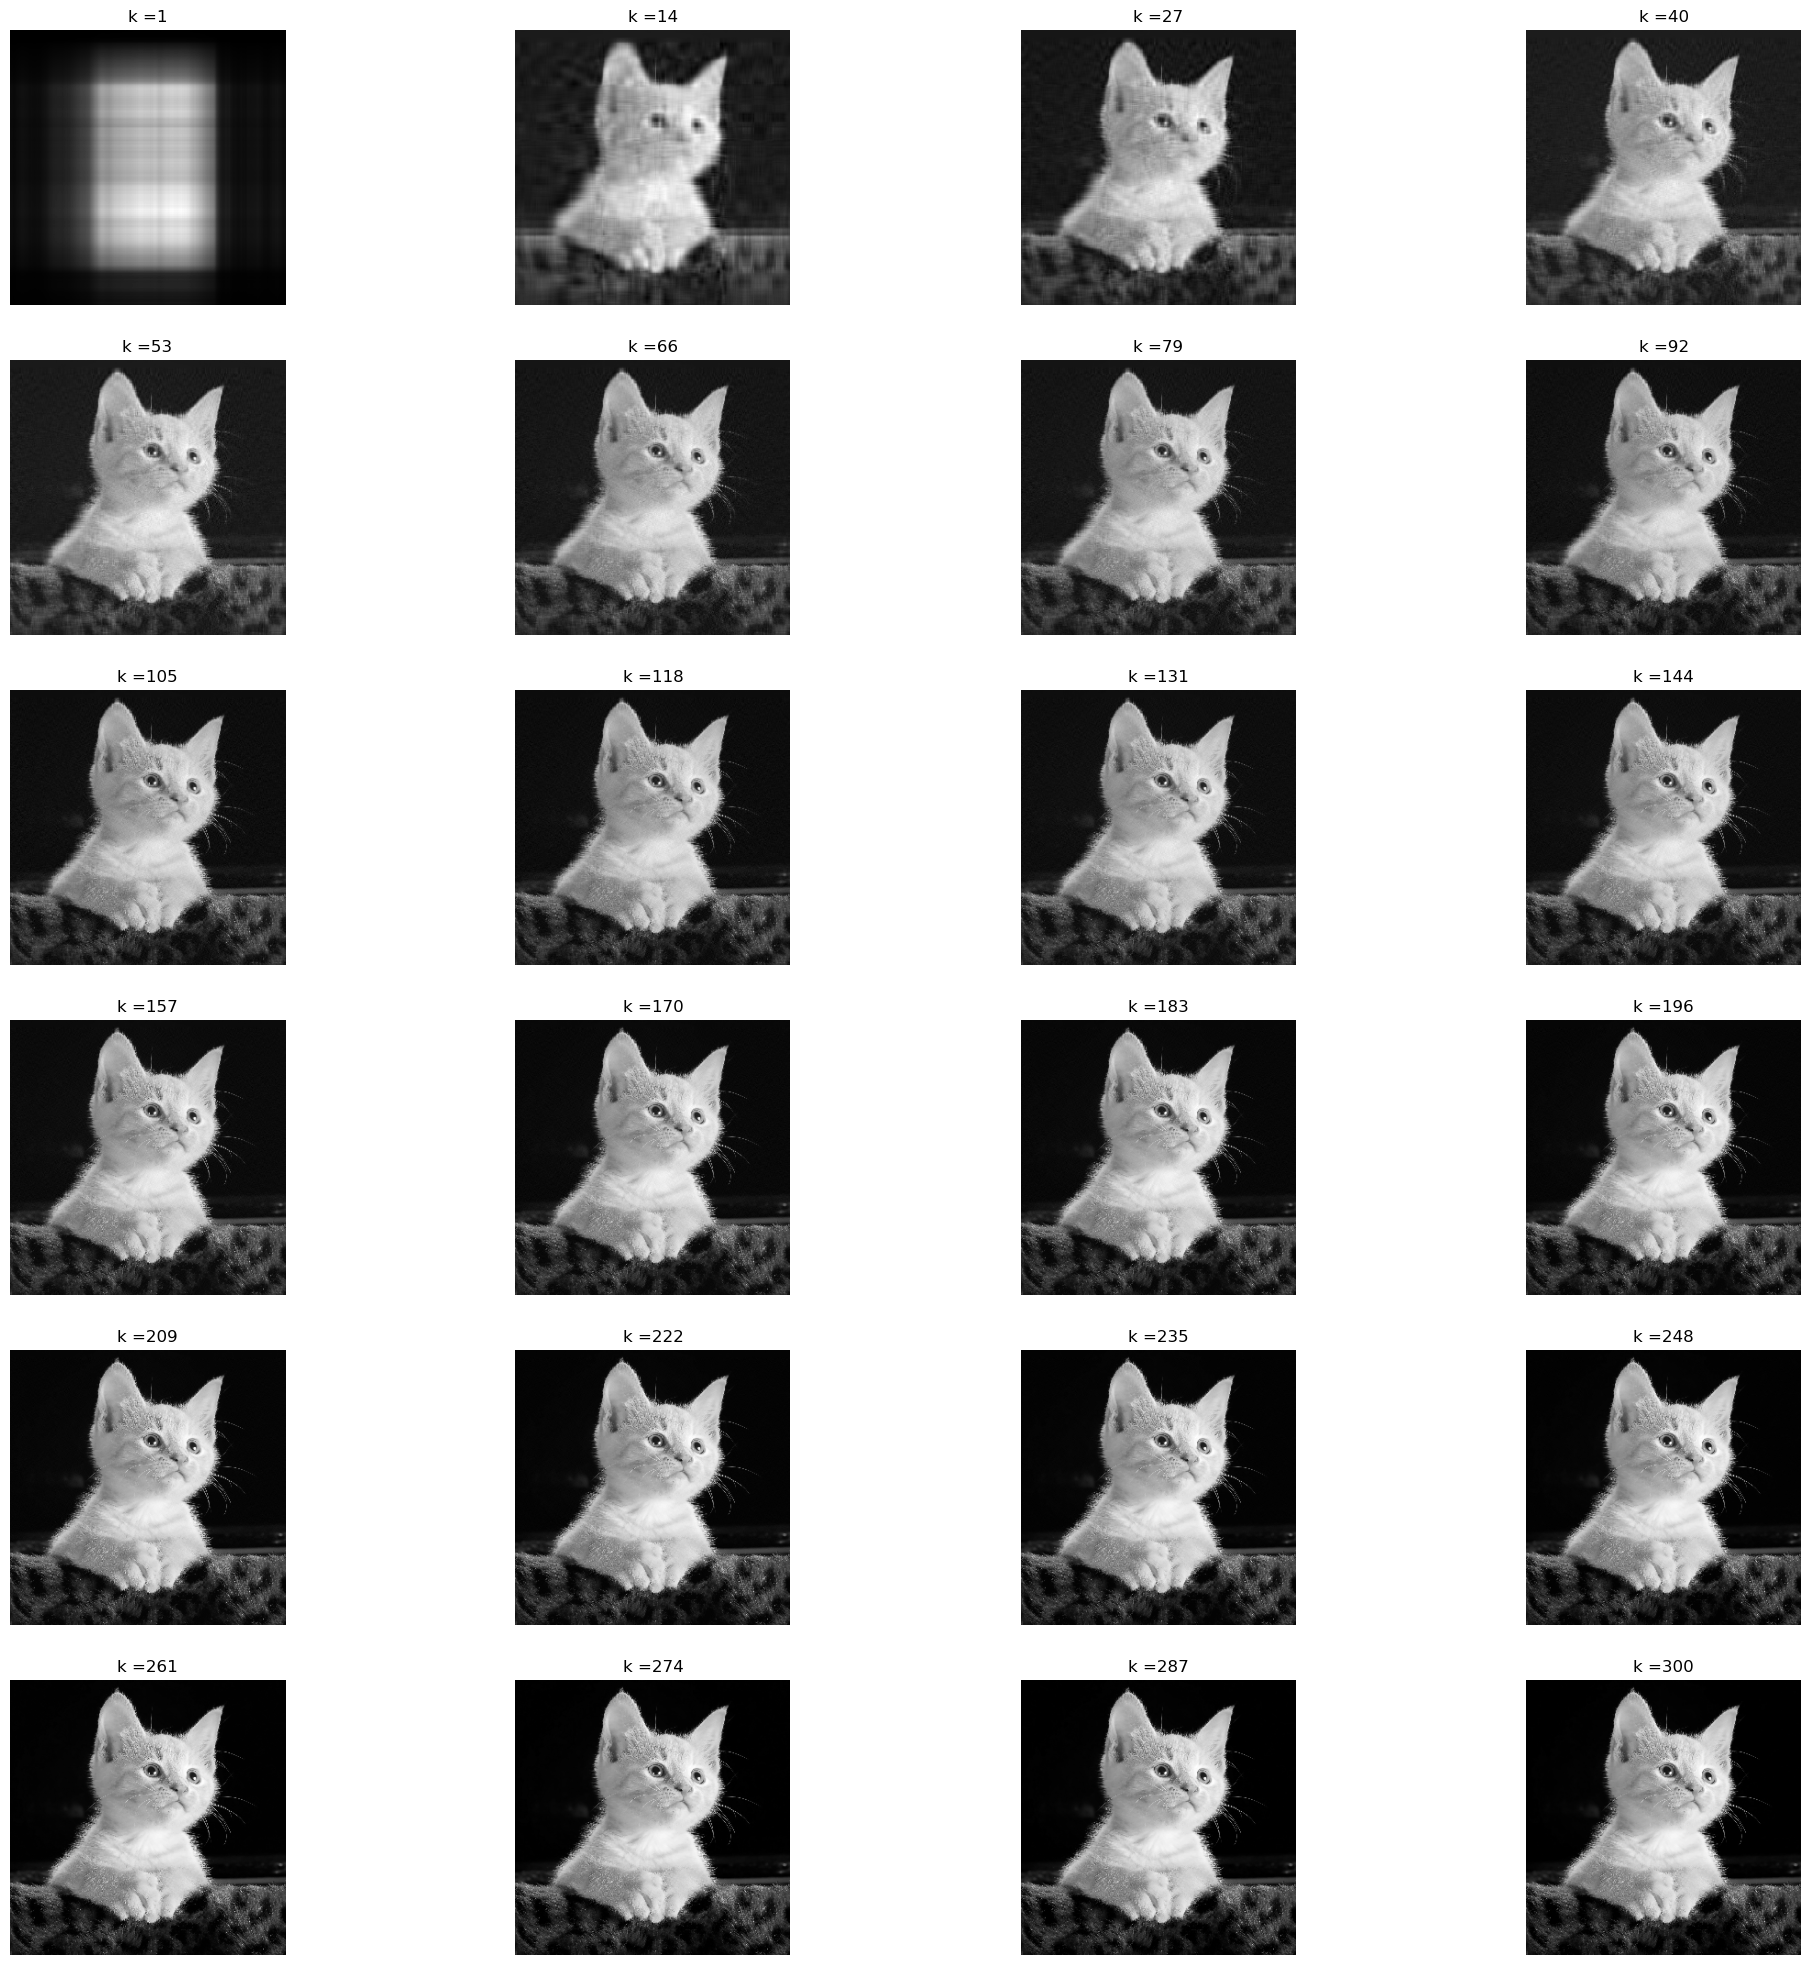

In [36]:
def main_application():
    color_image = cv2.imread('cat_final_project.jpeg')
    color_image = cv2.resize(color_image, (300, 300))
    ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
    gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
    metric_list, approx_list, k =  evaluate_svd_for_feature_compression_by_metric(gray_image, 1)
    print(len(approx_list))
    draw_metric_information(metric_list, k)
    draw_approx_image(approx_list, k)

main_application()

## Ôn tập code lại toàn bộ nội dong Project 1: Bài toán nén ảnh (compression image) - Tổng hợp lại chương trình nén dung lượng cho bước ảnh với từng giá k

300


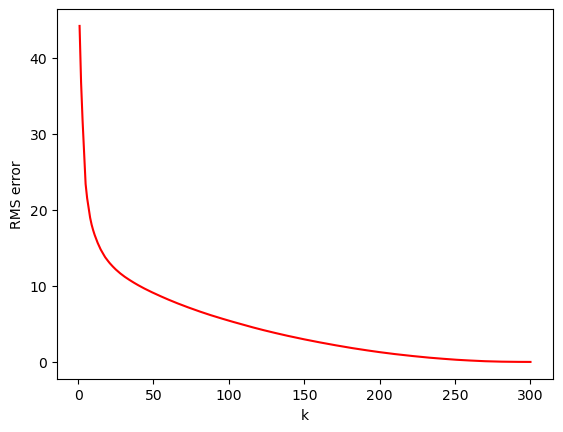

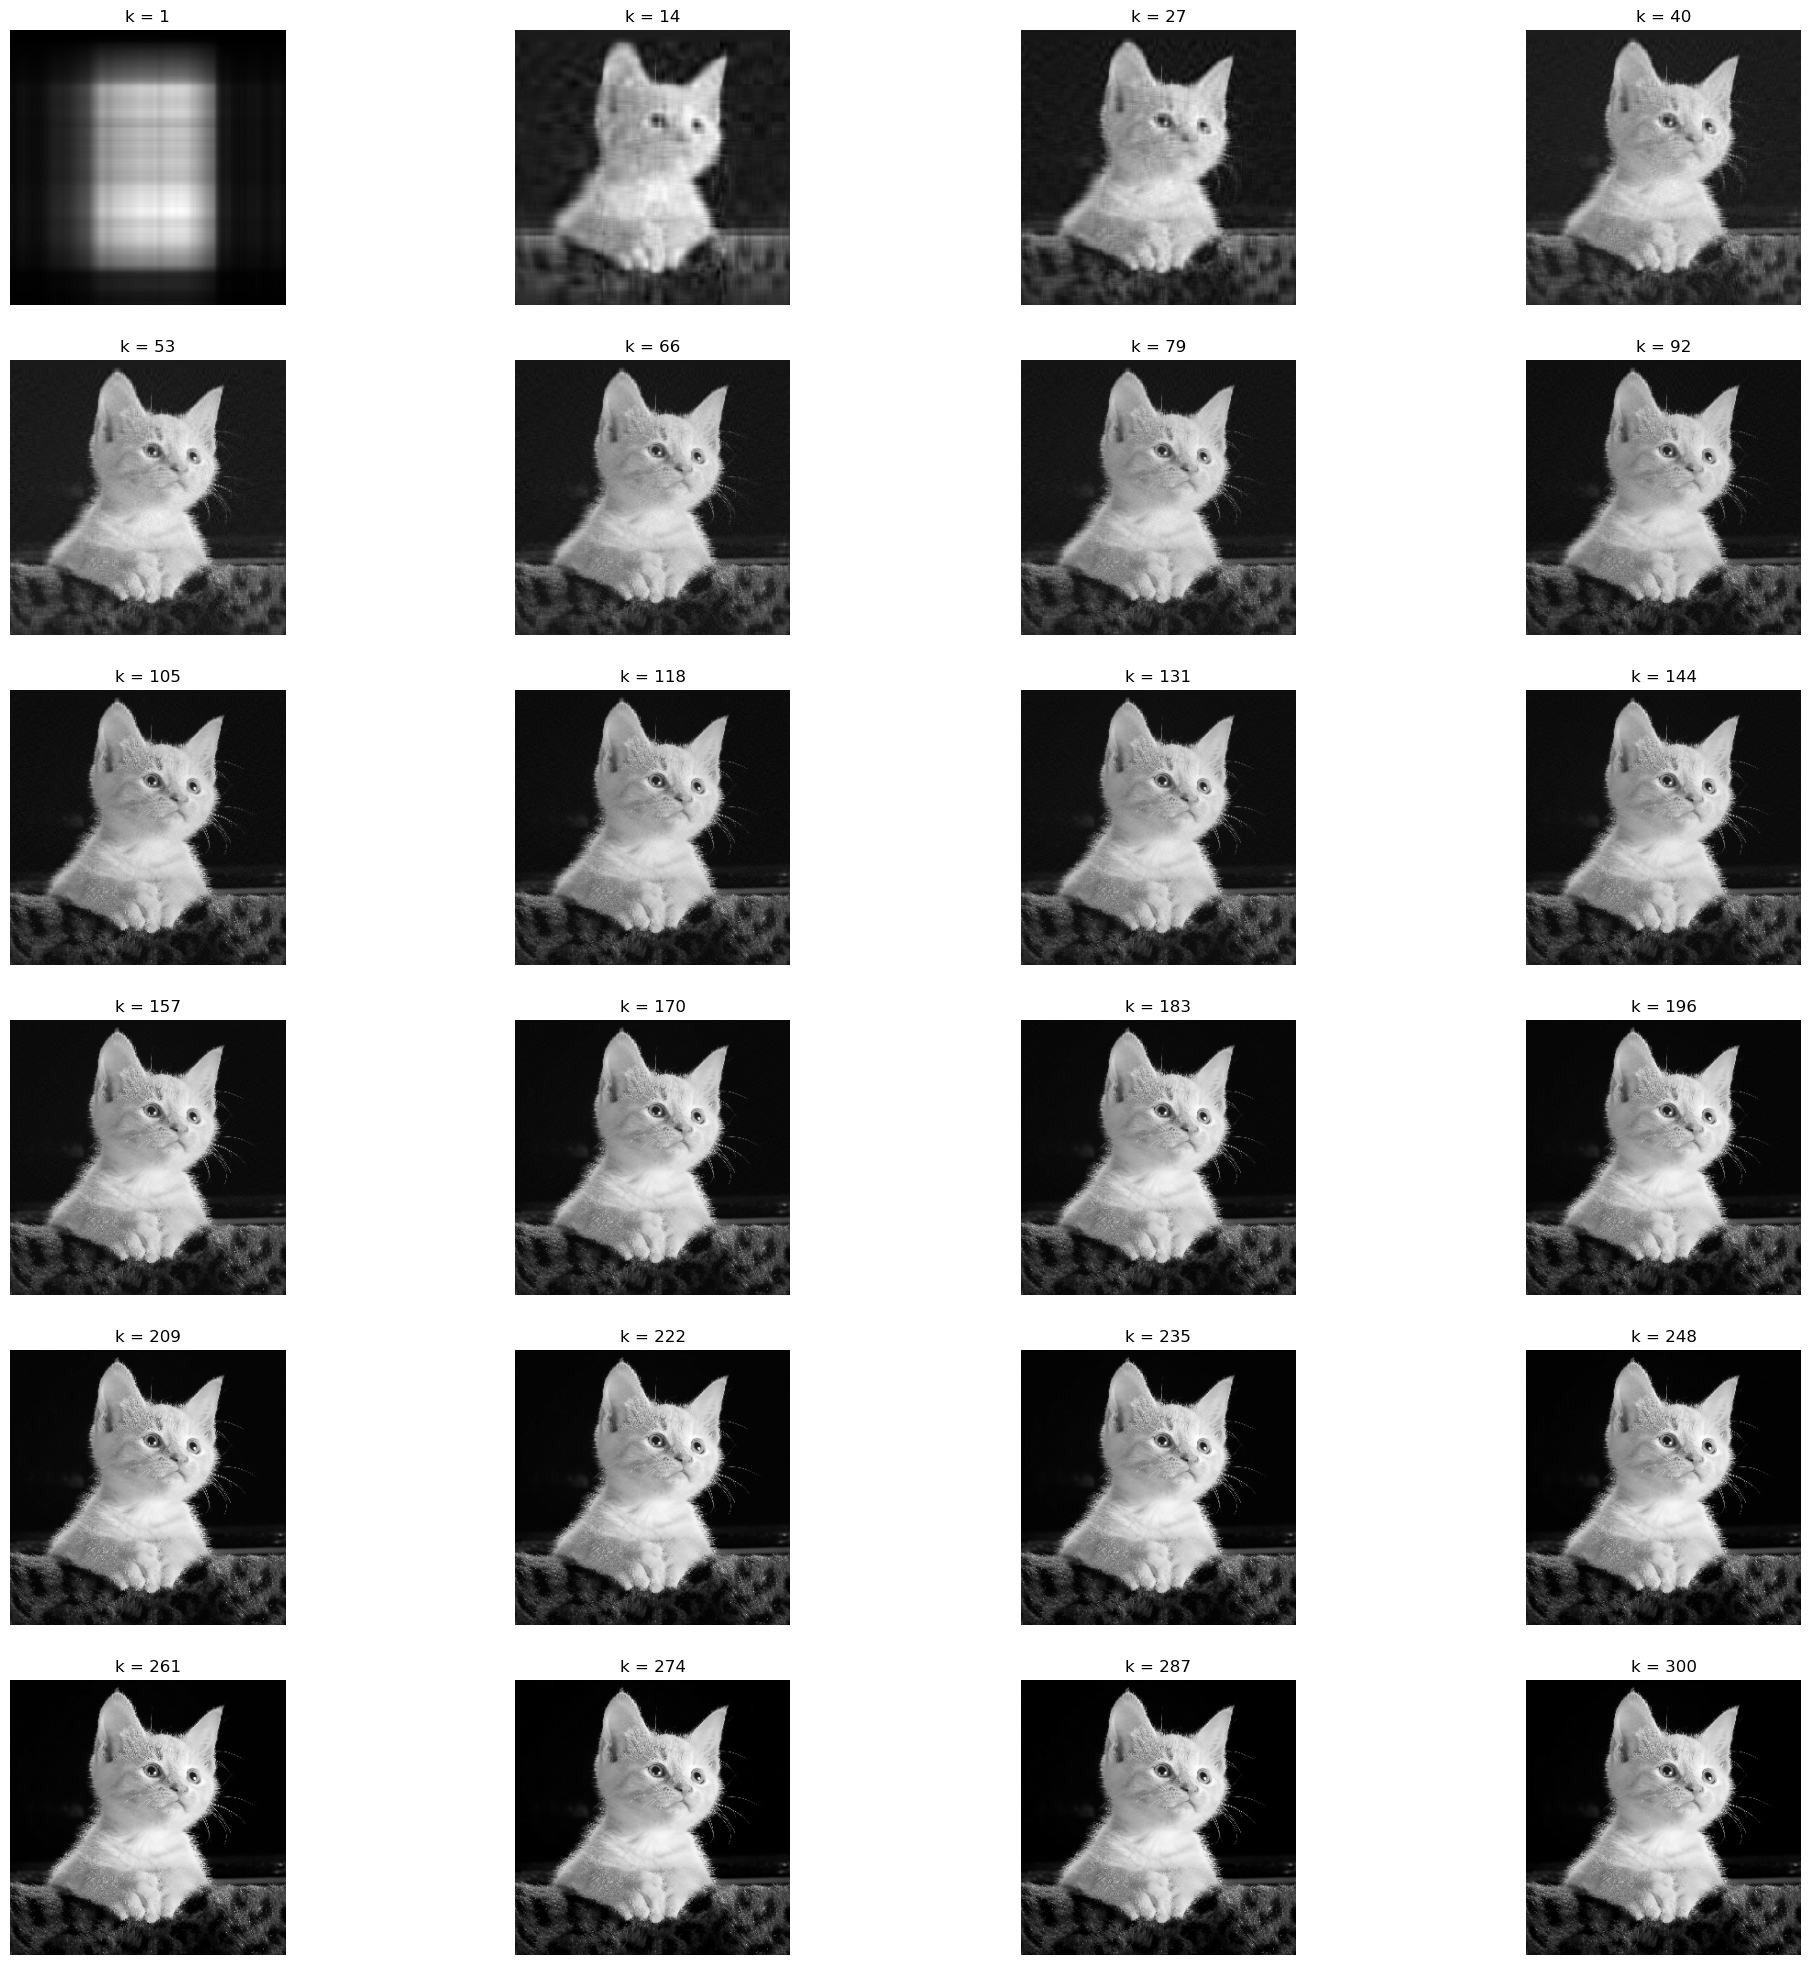

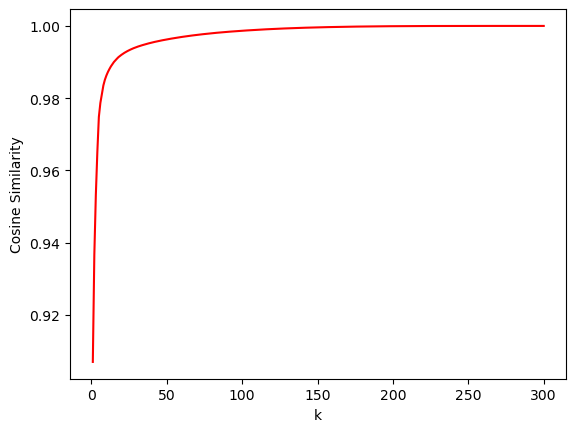

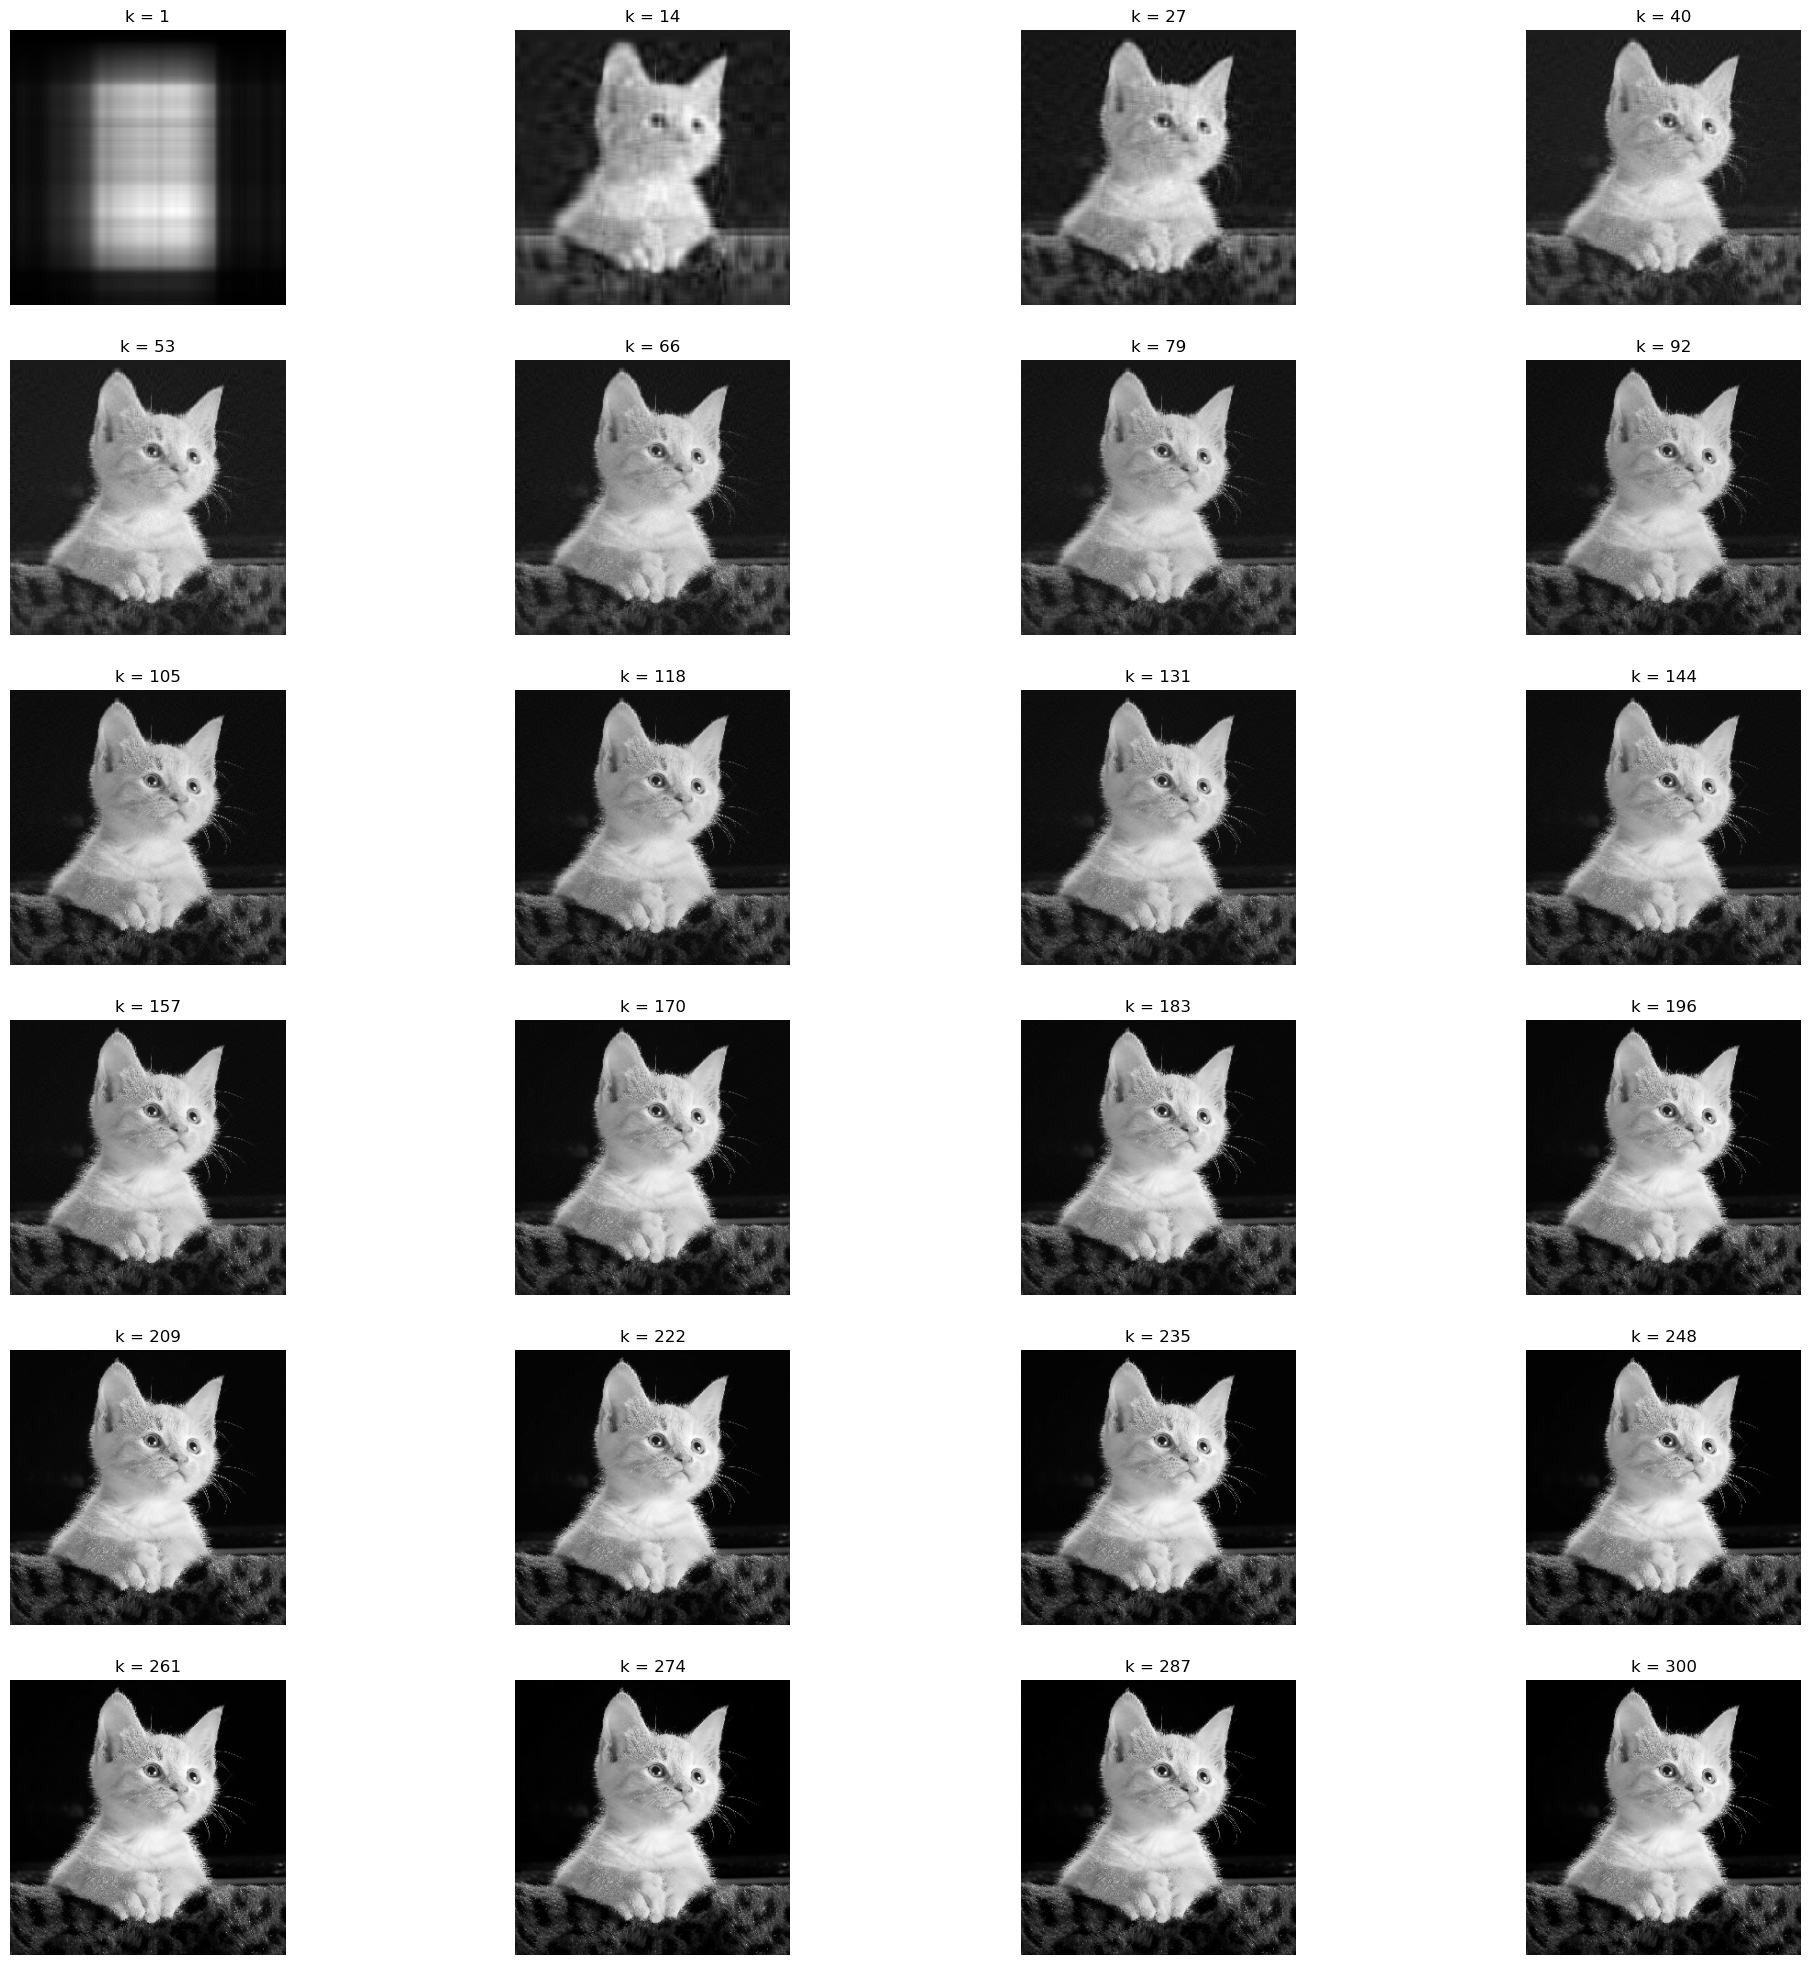

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def compute_svd(matrix):
    U, S, V_T = np.linalg.svd(matrix)
    return U, S, V_T

def compute_cosine_similarity(matrix1, matrix2):
    v1 = matrix1.flatten()
    v2 = matrix2.flatten()
    tich_vo_huong =  v1 @ v2
    tich_do_dai = np.linalg.norm(v1) * np.linalg.norm(v2)
    result = tich_vo_huong / tich_do_dai
    return result

def compute_rms_error(matrix1, matrix2):
    m, n = np.shape(matrix1)
    result = np.sqrt(np.sum(np.square(matrix1 - matrix2)) / (m * n))
    return result

def convertColorToGrayScale(image, ratio):
    result = image @ ratio
    result = result.astype(np.uint8)
    return result

def evaluate_svd_for_feature_compression_by_metric(gray_image, metric):
    U, S, V_T = compute_svd(gray_image)
    k = len(S)   
    S = np.diag(S)

    approx_list = [] # Danh sách chữ các ảnh đã được nén với từng giá trị k.
    metric_list = [] # Danh sách chứa từng độ lỗi giữa ảnh đã được nén với ảnh gốc ban đầu với từng giá trị k tương ứng.

    for i in range(1, k + 1, 1):
        approx = U[:, :i] @ S[:i, :i] @ V_T[:i, :]
        approx_list.append(approx)

        if metric == 0:
            metric_list.append(compute_cosine_similarity(gray_image, approx))
        else:
            metric_list.append(compute_rms_error(gray_image, approx))
        
    return metric_list, approx_list, k

def draw_metric_information_1(metric_list, k):
    x_axis = list(range(1, k + 1, 1))
    plt.xlabel('k')
    plt.ylabel('RMS error')
    plt.plot(x_axis, metric_list, color = 'r')
    plt.show()

def draw_metric_information_0(metric_list, k):
    x_axis = list(range(1, k + 1, 1))
    plt.xlabel('k')
    plt.ylabel('Cosine Similarity')
    plt.plot(x_axis, metric_list, color = 'r')
    plt.show()

def draw_approx_image(approx_list, k):
    row = 6
    col = 4
    fig = plt.figure(figsize = (25, 25))

    fig_index = 1

    for i in range(0, k, 13):
        fig.add_subplot(row, col, fig_index)
        plt.imshow(approx_list[i], cmap = 'gray')
        plt.axis('off')
        plt.title('k = ' + str(i + 1))
        fig_index = fig_index + 1

    plt.show()

if __name__ == "__main__":
    color_image = cv2.imread('cat_final_project.jpeg')
    color_image = cv2.resize(color_image, (300, 300))
    ratio_for_graysacle = [0.2126, 0.7152, 0.0722]
    img_gray_scale = convertColorToGrayScale(color_image, ratio_for_graysacle)
    metric_list1, approx_list1, k = evaluate_svd_for_feature_compression_by_metric(img_gray_scale, 1)
    metric_list0, approx_list0, k = evaluate_svd_for_feature_compression_by_metric(img_gray_scale, 0)
    print(len(approx_list1))
    draw_metric_information_1(metric_list1, k)
    draw_approx_image(approx_list1, k)
    draw_metric_information_0(metric_list0, k)
    draw_approx_image(approx_list0, k)

# Project 2: Ứng dụng SVD vào bài toán Image Denoising (bài toán giảm nhiễu trong hình ảnh)

## Giải thích thêm về cách chuyển từ ảnh màu sang ảnh xám


### 1️⃣ Ảnh màu dưới dạng ma trận
Một ảnh màu thường được biểu diễn dưới dạng một tensor (ma trận 3 chiều) với kích thước **(chiều cao, chiều rộng, số kênh màu)**. Trong ảnh RGB, số kênh màu là 3 (**Red, Green, Blue**), tức là mỗi pixel có 3 giá trị màu tương ứng.

### 2️⃣ Công thức chuyển đổi ảnh màu sang ảnh xám
Công thức phổ biến để chuyển đổi ảnh màu sang ảnh xám là:

$$
\text{Gray} = R \cdot w_R + G \cdot w_G + B \cdot w_B
$$

trong đó:
- $R, G, B $  là giá trị màu của từng kênh tại một pixel.
- $w_R, w_G, w_B $  là các trọng số (thường phản ánh độ nhạy của mắt người với từng màu).

Ví dụ, trọng số thường dùng theo chuẩn **ITU-R BT.601**:

$$
\text{Gray} = 0.2989 \cdot R + 0.5870 \cdot G + 0.1140 \cdot B
$$

### 3️⃣ Phép nhân ma trận trong Python
Giả sử `color_image` có dạng `(H, W, 3)`, còn `ratio_for_grayscale` có dạng `(3,)`, khi thực hiện phép nhân ma trận:

```python
gray_img = color_image @ ratio_for_grayscale
```

Phép toán này hoạt động như sau:

$$
\begin{bmatrix} R & G & B \end{bmatrix} 
\begin{bmatrix} w_R \\ w_G \\ w_B \end{bmatrix} 
= \text{Gray}
$$

Mỗi pixel trong ảnh đầu ra chỉ có **một giá trị xám**, tức là ảnh đã được chuyển thành ảnh grayscale.

Sau phép chuyển đổi thì ảnh màu có dạng $(H, W, 3)$ sang ảnh xám có dạng $(H, W)$ là array ở dạng $2D$

In [80]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def compute_cosine_similarity(matrix1, matrix2):
    v1 = matrix1.flatten()
    v2 = matrix2.flatten()
    tich_vo_huong = v1 @ v2
    tich_do_dai = np.linalg.norm(v1) * np.linalg.norm(v2)
    result = tich_vo_huong / tich_do_dai
    return result

def compute_rms_error(matrix1, matrix2):
    m, n = np.shape(matrix1)
    result = np.sqrt(np.sum(np.square(matrix1 - matrix2)) / (m * n))
    return result
    
def compute_svd(gray_img):
    U, S, V_T = np.linalg.svd(gray_img)
    return U, S, V_T
def convertColorToGrayScale(color_image, ratio_for_grayscale):
    gray_img = color_image @ ratio_for_grayscale
    gray_img = gray_img.astype(np.uint8)
    return gray_img
def addNoiseToImage(image, mean = 0, stddev = 25):
    #uncoment the following three lines of codes for anthor project
    """
    noise = np.random.normal(mean, stddev, image.shape)
    noise = np.where(noise > 0, np.around(noise), 0)
    np.save("noise.npy", noise)
    """
    noise = np.load("noise.npy")
    #Add noise to image
    noisy_img = cv2.add(image, noise)
    return noisy_img  
def perform_image_denoise(noise_img, sigma_threshold):
    #calculate U(u), Σ (s) and V(vh)
    u, s, vh = compute_svd(noise_img)
    #Remove sigma values below sigma_thresholde
    
    s_cleaned = np.where(s > sigma_threshold, s, 0)
    s_cleaned = np.diag(s_cleaned)
    img_denoised = u @ s_cleaned @ vh
    #img_denoised = np.clip(img_denoised, 0, 255).astype('uint8')

    return img_denoised

### Question 7

In [68]:
color_image = cv2.imread("cat_final_project.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)

noise_image = addNoiseToImage(gray_image)
avg_org = np.sum(gray_image)/(gray_image.shape[0]*gray_image.shape[1])
avg_noise = np.sum(noise_image)/(gray_image.shape[0]*gray_image.shape[1])

print("avg_org: ", round(avg_org,2))
print("avg_noise: ", round(avg_noise,2))

avg_org:  66.33
avg_noise:  76.23


### Question 8

In [102]:
color_image = cv2.imread("cat_final_project.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
noise_gray_image = addNoiseToImage(gray_image, 0, 25)
print(gray_image.dtype)
print(noise_gray_image.dtype)

#Perform image denois
sigma_threshold = 200
denoise_image = perform_image_denoise(noise_gray_image, sigma_threshold)
print(denoise_image)
similarity = compute_rms_error(denoise_image,gray_image)
print("similarity",  round(similarity,2))
#print(denoise_image.dtype)
denoise_image = np.clip(denoise_image, 0, 255).astype('uint8')
print(denoise_image.dtype)
print(denoise_image)

cv2.imshow("Denoised Image", denoise_image)  # Thêm tên cửa sổ hiển thị
cv2.imshow('noise_gray_image', noise_gray_image)
cv2.waitKey(0)  # Chờ phím bất kỳ để đóng cửa sổ
cv2.destroyAllWindows()  # Đóng tất cả cửa sổ


uint8
uint8
[[ 1.86146815  4.10146087 -2.4732031  ...  1.1292022   4.31017978
  47.56742433]
 [-5.08866502  6.97923336 10.18372921 ... 17.82665617 21.5845132
   2.4770074 ]
 [ 0.91921561 26.19861079  0.88006202 ... 33.18483549 21.58827995
  10.73274295]
 ...
 [32.77716685 48.90959235 29.11824958 ... 26.54157777 58.86193314
   7.01712207]
 [53.17955906 53.2566645  30.80375232 ... 18.45449584  4.39018738
  13.96059768]
 [43.39439745 85.99534082 19.28951308 ... 24.19603981  7.63275518
  20.48964584]]
similarity 17.28
uint8
[[ 1  4  0 ...  1  4 47]
 [ 0  6 10 ... 17 21  2]
 [ 0 26  0 ... 33 21 10]
 ...
 [32 48 29 ... 26 58  7]
 [53 53 30 ... 18  4 13]
 [43 85 19 ... 24  7 20]]


### Question 9

In [104]:
#Read an colori mage
color_image = cv2.imread("cat_final_project.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
print(gray_image.dtype)
noise_gray_image = addNoiseToImage(gray_image, 0, 25)
print(noise_gray_image.dtype)
#Perform image denois
sigma_threshold = 200
denoise_image = perform_image_denoise(noise_gray_image, sigma_threshold)
print(denoise_image.dtype)
'''
v1 = denoise_image.flatten()
v2 = gray_image.flatten()
print(v1)
print(v2)
tich_vo_huong = v1 @ v2
tich_do_dai = np.linalg.norm(v1) * np.linalg.norm(v2)
result = tich_vo_huong / tich_do_dai
print(result)
'''
similarity = compute_cosine_similarity(denoise_image,gray_image)
print("similarity",  round(similarity,4))
denoise_image = np.clip(denoise_image, 0, 255).astype('uint8')
print(denoise_image.dtype)
print(denoise_image)
cv2.imshow('denoise_image', denoise_image)
cv2.waitKey(0)  # Chờ phím bất kỳ để đóng cửa sổ
cv2.destroyAllWindows()  # Đóng tất cả cửa sổ

uint8
uint8
float64
similarity 0.9895
uint8
[[ 1  4  0 ...  1  4 47]
 [ 0  6 10 ... 17 21  2]
 [ 0 26  0 ... 33 21 10]
 ...
 [32 48 29 ... 26 58  7]
 [53 53 30 ... 18  4 13]
 [43 85 19 ... 24  7 20]]


In [106]:
def find_best_sigma_image_denoise(noise_img, orignial_image, metric = 0, sigma_range = 1000):
    # Calculate U(u),  Σ (s) and V (vh)
    u, s, vh = compute_svd(noise_img)
    # Select the best threshold that has minimum RMS error
    evaluation_history = []
    for i in range(1, sigma_range):
        s_cleaned = np.where(s > i, s, 0)
        s_cleaned = np.diag(s_cleaned)
        img_denoised = u @ s_cleaned @ vh

        if metric == 0:
            similarity = compute_cosine_similarity(orignial_image, img_denoised)
            evaluation_history.append(similarity)
        else:
            error = compute_rms_error(orignial_image, img_denoised)
            evaluation_history.append(error)
    if metric == 0:
        best_index = evaluation_history.index(max(evaluation_history))
    else:
        best_index = evaluation_history.index(min(evaluation_history))

    return best_index, evaluation_history

### Question 10

In [118]:
def find_best_sigma_based_cosine():
  #Read an colori mage
  color_image = cv2.imread('cat_final_project.jpeg')

  #Resize an image to (300,300)
  color_image = cv2.resize(color_image, (300,300))

  #Convert image to grayscale
  ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
  gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)

  #Save resized grayscale image to file gray_image.png
  cv2.imwrite("gray_image.png", gray_image)

  # Add Gaussian noise to gray image
  noise_gray_image = addNoiseToImage(gray_image, 0, 25)

  #Save noisy grayscale image to file noise_gray_image.png
  cv2.imwrite("noise_gray_image.png", noise_gray_image)

  metric = 1 # for RMSE
  best_threshold, evaluation_history = find_best_sigma_image_denoise(noise_gray_image, gray_image, metric)
  print("best sigma: ", best_threshold)

find_best_sigma_based_cosine()

best sigma:  546


In [116]:
def find_best_sigma_based_cosine():
  #Read an colori mage
  color_image = cv2.imread('cat_final_project.jpeg')

  #Resize an image to (300,300)
  color_image = cv2.resize(color_image, (300,300))

  #Convert image to grayscale
  ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
  gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)

  #Save resized grayscale image to file gray_image.png
  cv2.imwrite("gray_image.png", gray_image)

  # Add Gaussian noise to gray image
  noise_gray_image = addNoiseToImage(gray_image, 0, 25)

  #Save noisy grayscale image to file noise_gray_image.png
  cv2.imwrite("noise_gray_image.png", noise_gray_image)

  metric = 0 # for Cosine
  best_threshold, evaluation_history = find_best_sigma_image_denoise(noise_gray_image, gray_image, metric)
  print("best sigma: ", best_threshold)

find_best_sigma_based_cosine()

best sigma:  504


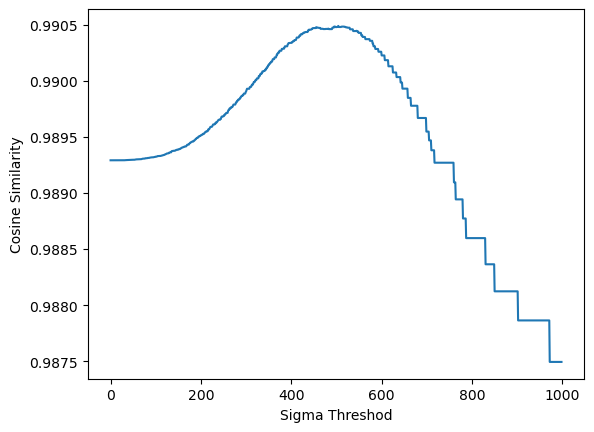

In [28]:
def plot_chart_based_cosine():
  #Read an colori mage
  color_image = cv2.imread('cat_final_project.jpeg')

  #Resize an image to (300,300)
  color_image = cv2.resize(color_image, (300,300))

  #Convert image to grayscale
  ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
  gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)

  #Save resized grayscale image to file gray_image.png
  cv2.imwrite("gray_image.png", gray_image)

  # Add Gaussian noise to gray image
  noise_gray_image = addNoiseToImage(gray_image, 0, 25)

  #Save noisy grayscale image to file noise_gray_image.png
  cv2.imwrite("noise_gray_image.png", noise_gray_image)

  metric = 0 # for cosine similarity
  best_threshold, evaluation_history = find_best_sigma_image_denoise(noise_gray_image, gray_image, metric)

  plt.plot(evaluation_history)
  plt.xlabel("Sigma Threshod")
  plt.ylabel("Cosine Similarity")
  plt.show()

plot_chart_based_cosine()

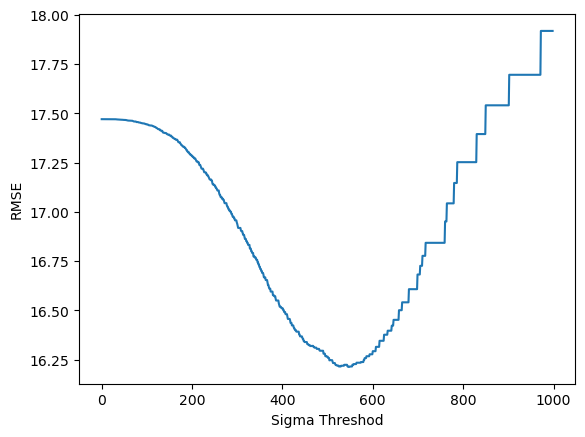

In [30]:
def plot_chart_based_rmse():
  #Read an colori mage
  color_image = cv2.imread("cat_final_project.jpeg")

  #Resize an image to (300,300)
  color_image = cv2.resize(color_image, (300,300))

  #Convert image to grayscale
  ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
  gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)

  #Save resized grayscale image to file gray_image.png
  cv2.imwrite("gray_image.png", gray_image)

  # Add Gaussian noise to gray image
  noise_gray_image = addNoiseToImage(gray_image, 0, 25)

  #Save noisy grayscale image to file noise_gray_image.png
  cv2.imwrite("noise_gray_image.png", noise_gray_image)

  metric = 1 # for cosine similarity
  best_threshold, evaluation_history = find_best_sigma_image_denoise(noise_gray_image, gray_image, metric)

  plt.plot(evaluation_history)
  plt.xlabel("Sigma Threshod")
  plt.ylabel("RMSE")
  plt.show()

plot_chart_based_rmse()

# Trả lời được câu hỏi còn vướng mắc: Tại sao khi tính toán lại để kiểu dữ là float64 mà không để kiểu dữ liệu là uint8 mà chỉ khi tính xong xuôi, ta mới chuyển toàn bộ ảnh từ kiểu dữ liệu float64 sang uint8 để hiển thị, mà không chuyển ảnh sang uint8 trước để tính toán, rồi hiển thị.